# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

data_path = 'D:\ITI\ML_unsupervised\CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12




1. **BALANCE:** This feature represents the outstanding balance amount left on the credit card.

2. **BALANCE_FREQUENCY:** It indicates how frequently the balance is updated, usually measured as a fraction or percentage.

3. **PURCHASES:** This feature represents the total amount of purchases made on the credit card.

4. **ONEOFF_PURCHASES:** It denotes the total amount of one-off purchases made (non-recurring purchases) on the credit card.

5. **INSTALLMENTS_PURCHASES:** This feature indicates the total amount of purchases made in installments ( recurring purchases) on the credit card.

6. **CASH_ADVANCE:** It represents the total amount of cash advances taken from the credit card.

7. **PURCHASES_FREQUENCY:** This feature measures how frequently purchases are made on the credit card, typically expressed as a fraction or percentage.

8. **ONEOFF_PURCHASES_FREQUENCY:** It indicates the frequency of one-off purchases made on the credit card, usually expressed as a fraction or percentage.

9. **PURCHASES_INSTALLMENTS_FREQUENCY:** This feature measures the frequency of purchases made in installments on the credit card, typically expressed as a fraction or percentage.

10. **CASH_ADVANCE_FREQUENCY:** It represents the frequency of cash advances taken from the credit card, usually expressed as a fraction or percentage.

11. **CASH_ADVANCE_TRX:** This feature denotes the number of transactions involving cash advances made on the credit card.

12. **PURCHASES_TRX:** It indicates the number of purchase transactions made on the credit card.

13. **CREDIT_LIMIT:** This feature represents the credit limit assigned to the credit card.

14. **PAYMENTS:** It denotes the total amount of payments made by the cardholder.

15. **MINIMUM_PAYMENTS:** This feature represents the minimum amount of payment required by the cardholder.

16. **PRC_FULL_PAYMENT:** It indicates the percentage of the full credit card payment paid by the cardholder.

17. **TENURE:** This feature represents the length of time the credit card holder has been a customer.


In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
round(df.isnull().sum(axis=0))

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# feel free to investigate what you want

In [9]:
df.duplicated().sum()
#no duplicates

0

In [10]:
#check for data type for each column
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

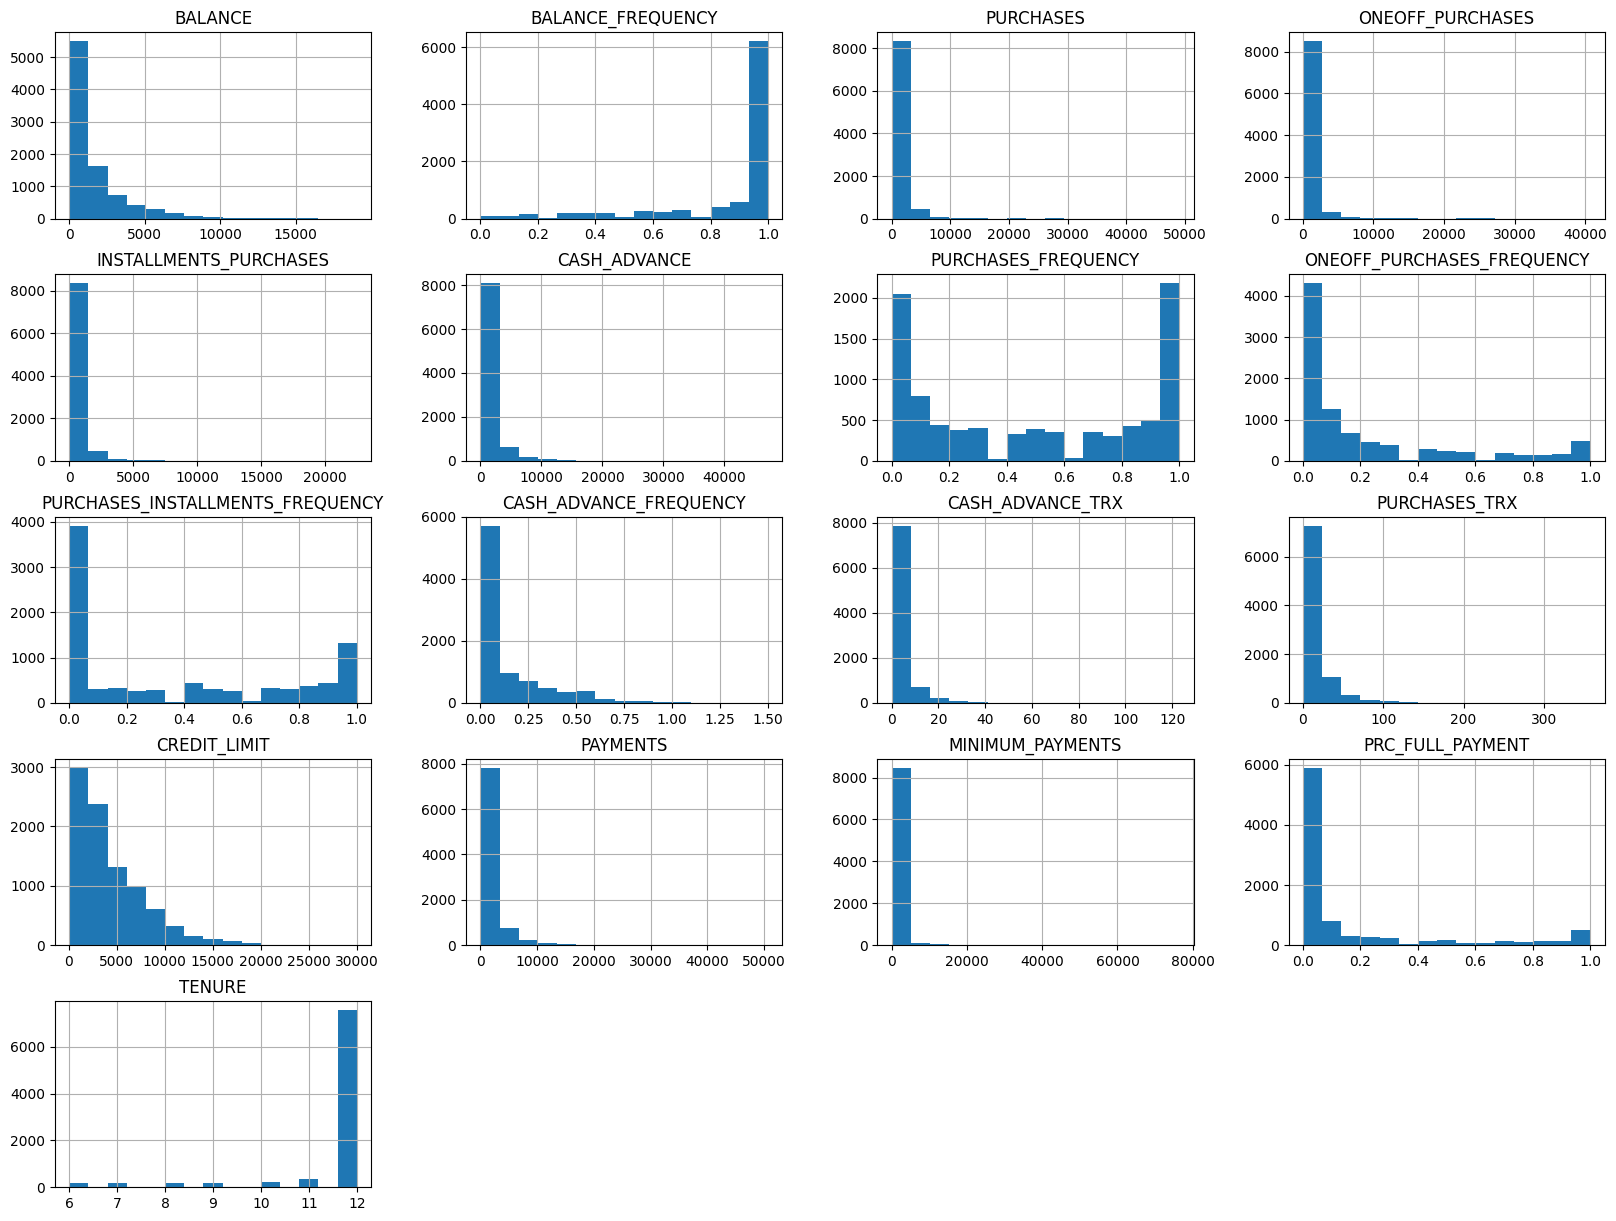

In [11]:
df.hist(bins=15, figsize=(20, 15), layout=(5, 4))

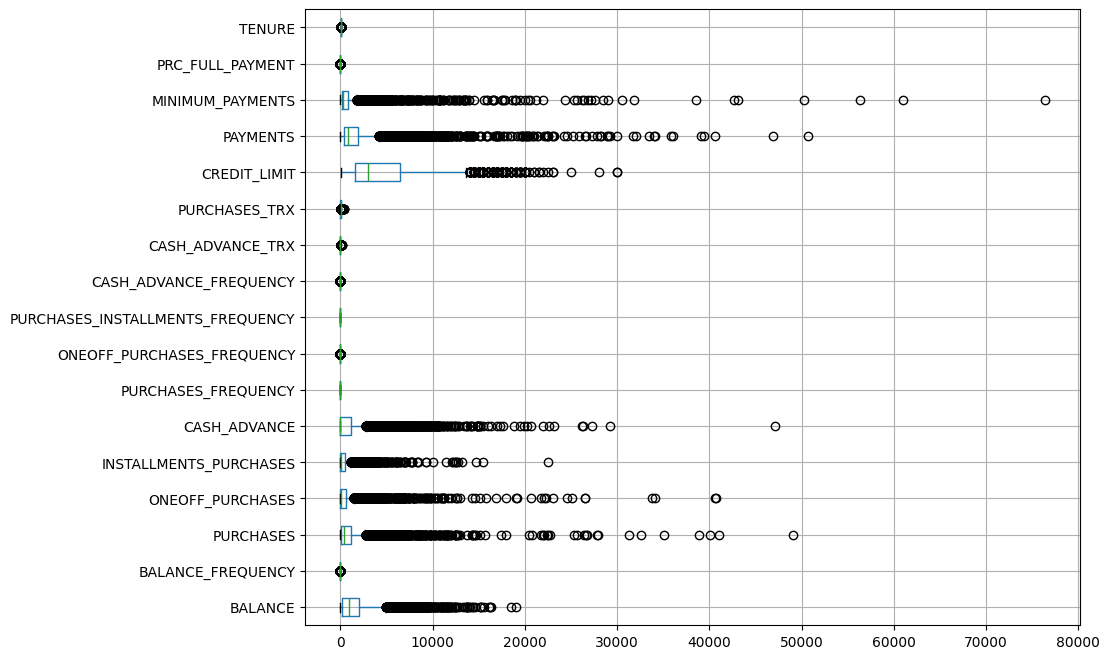

In [12]:
# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10,8))  
df[numerical_columns].boxplot(vert=False, figsize=(20, 16))


# Display the plot
plt.show()

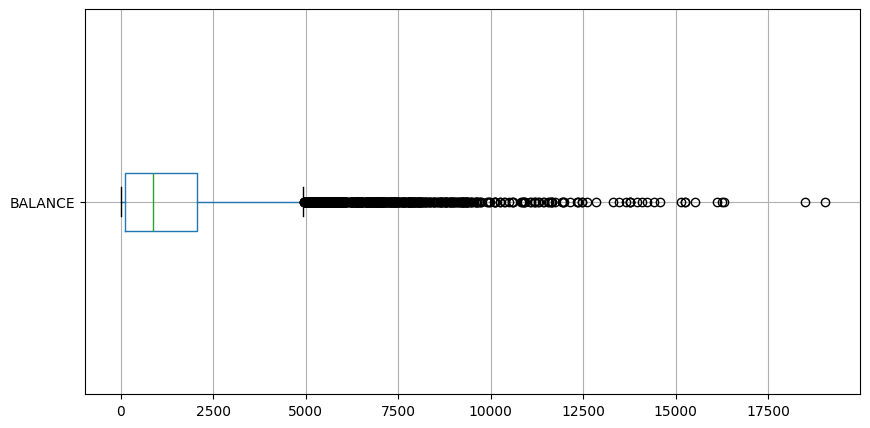

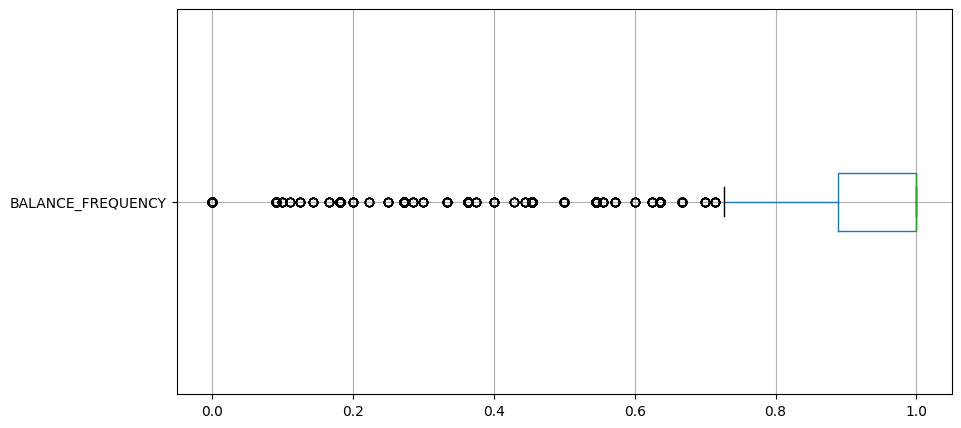

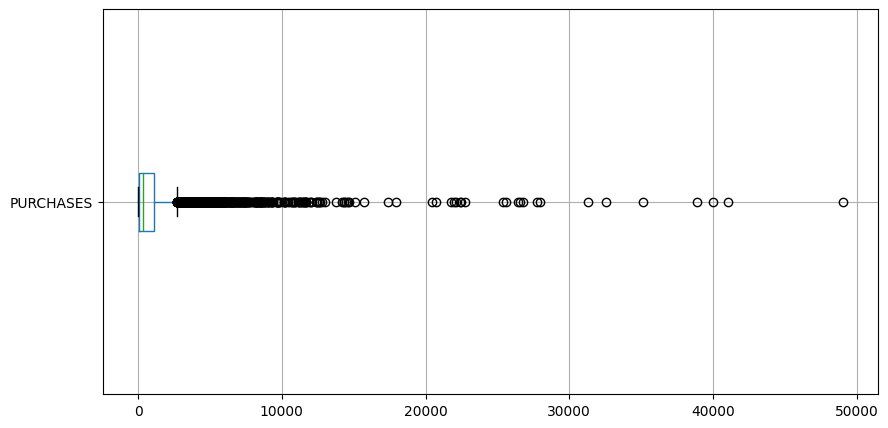

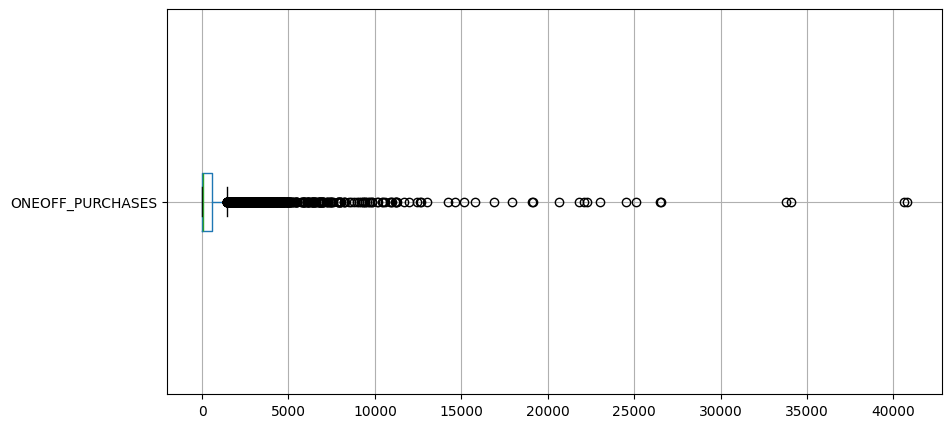

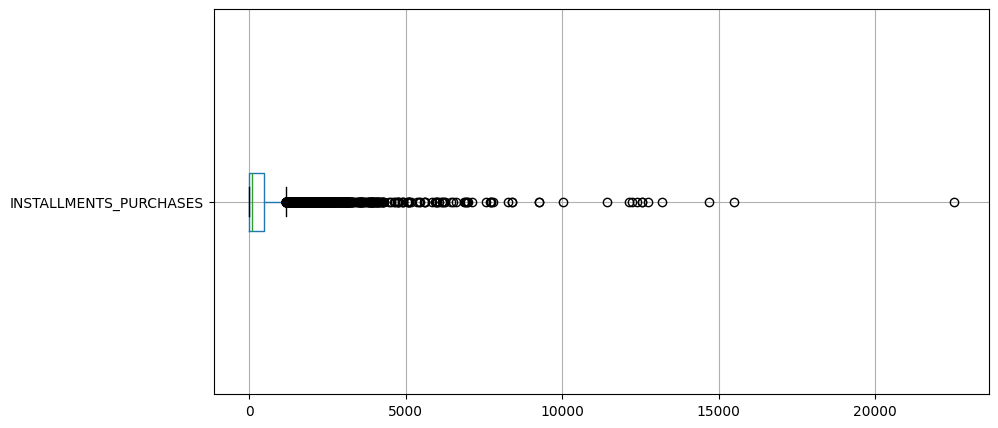

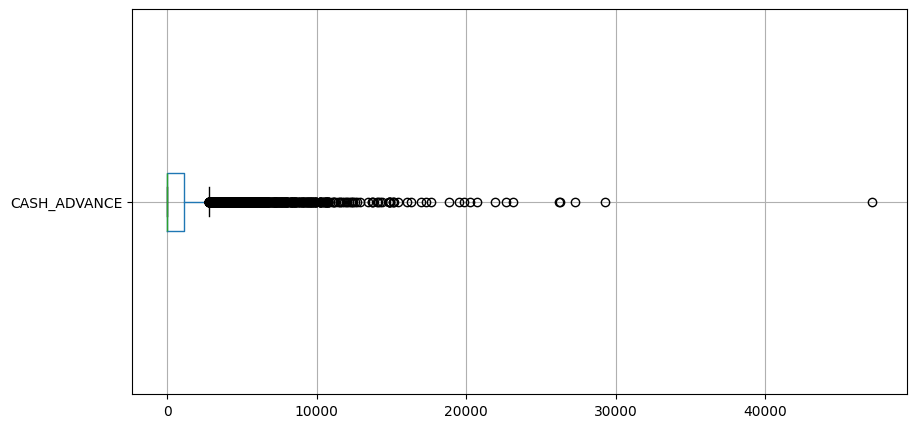

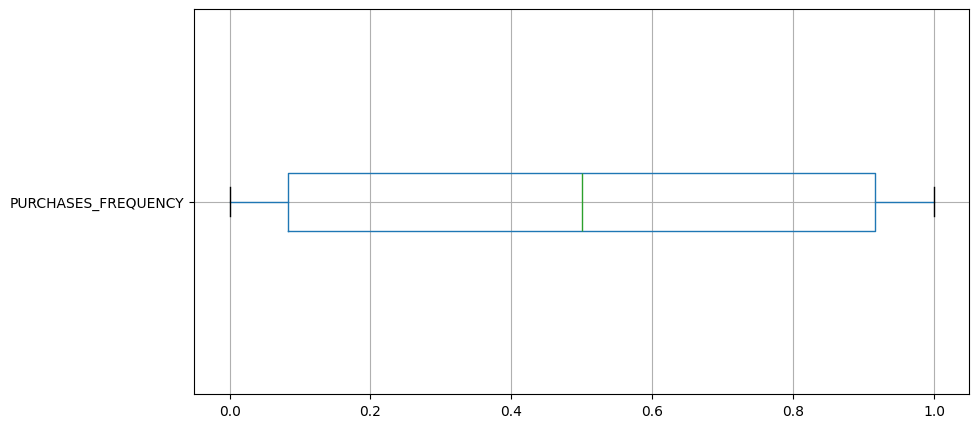

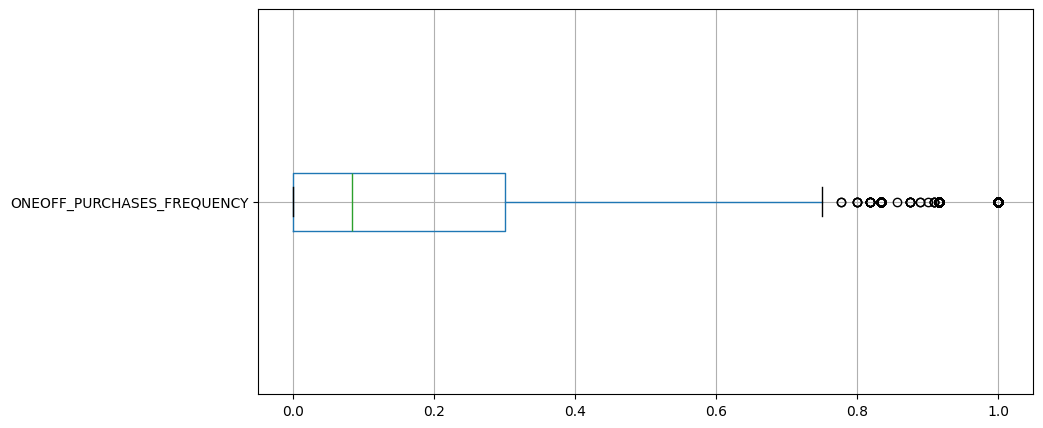

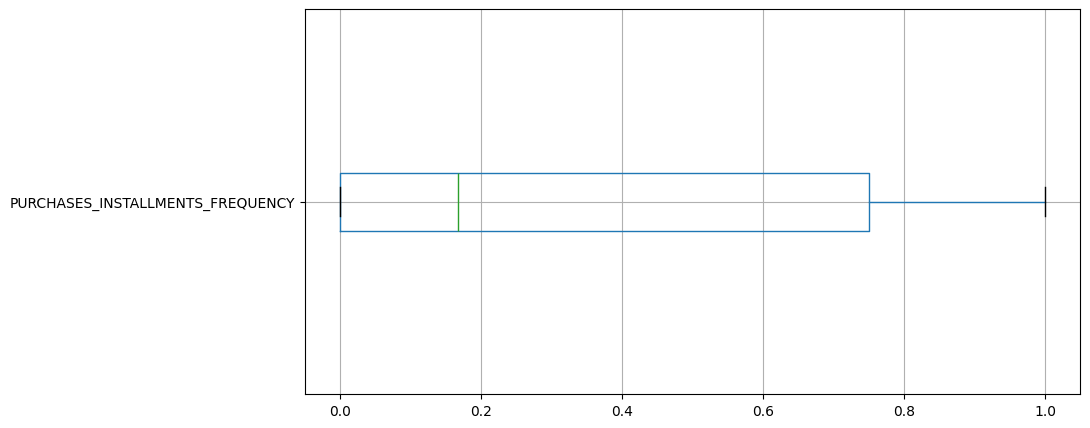

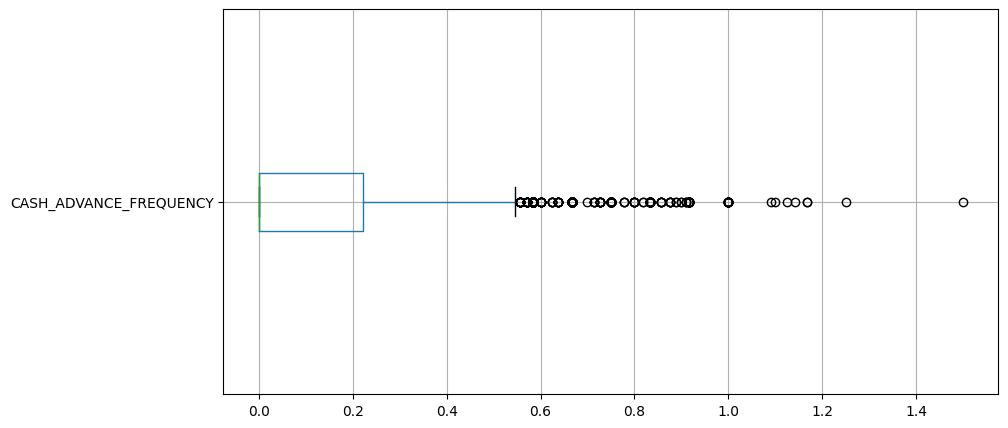

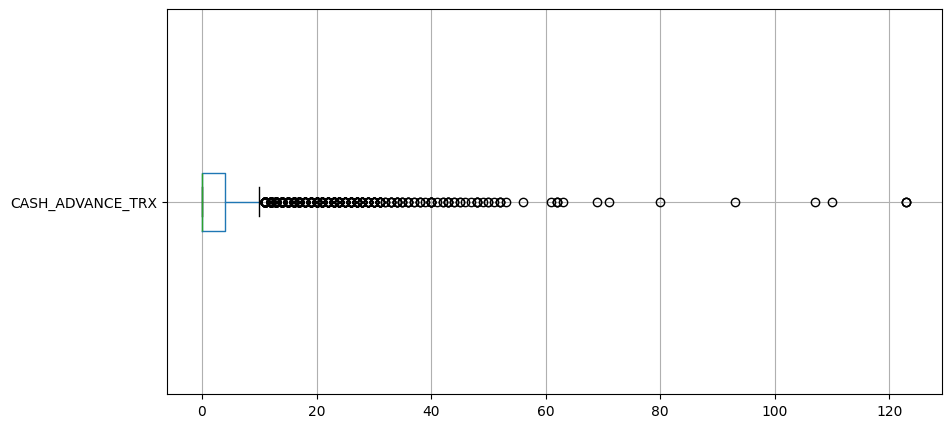

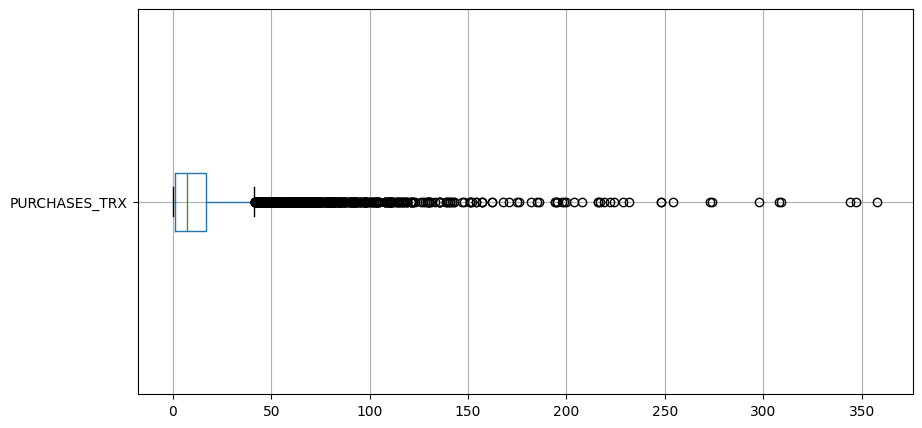

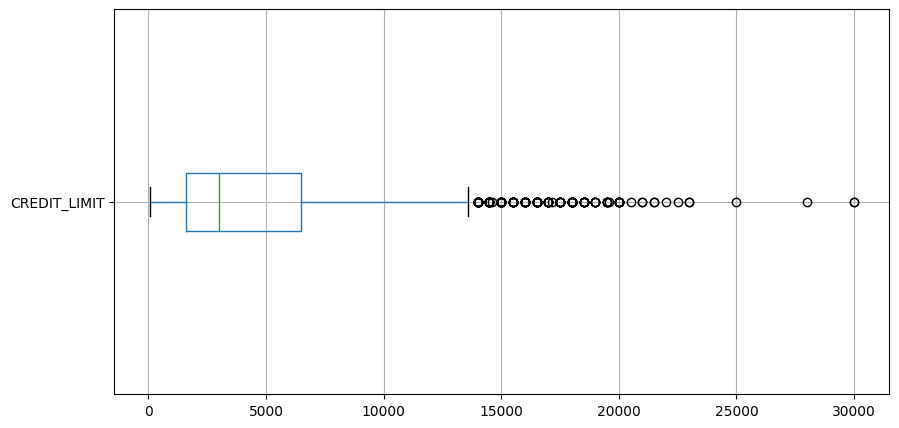

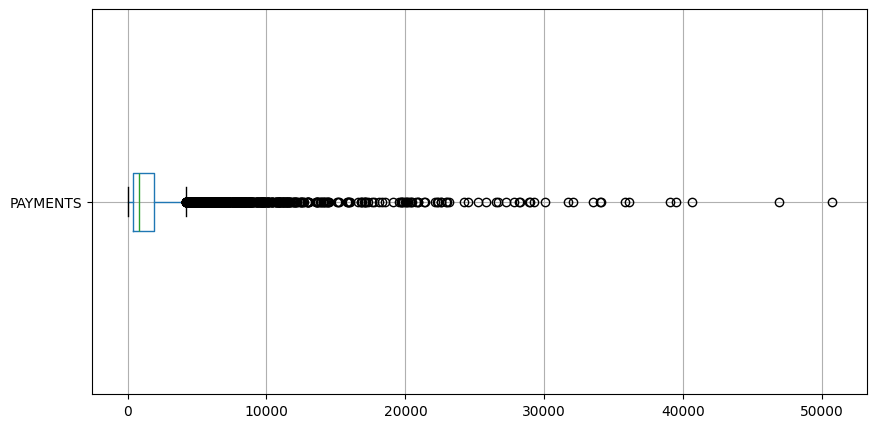

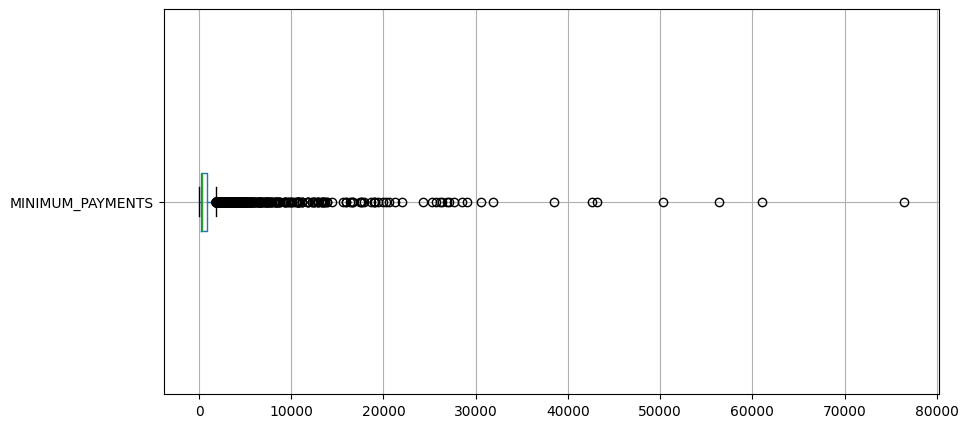

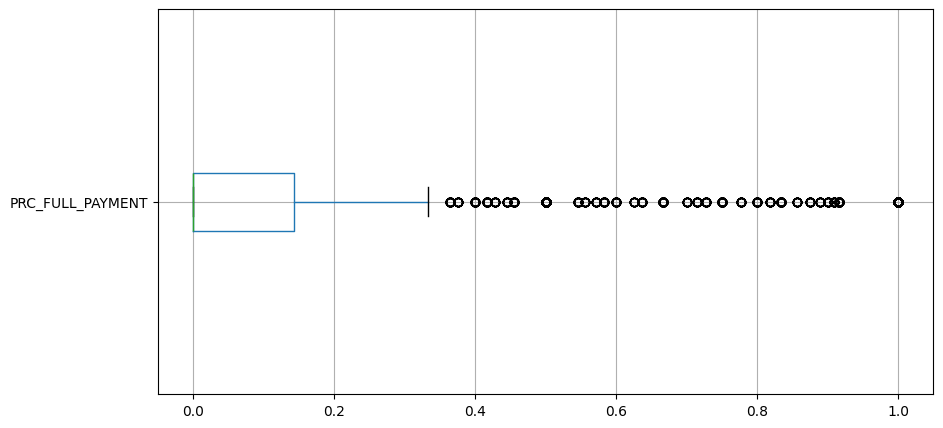

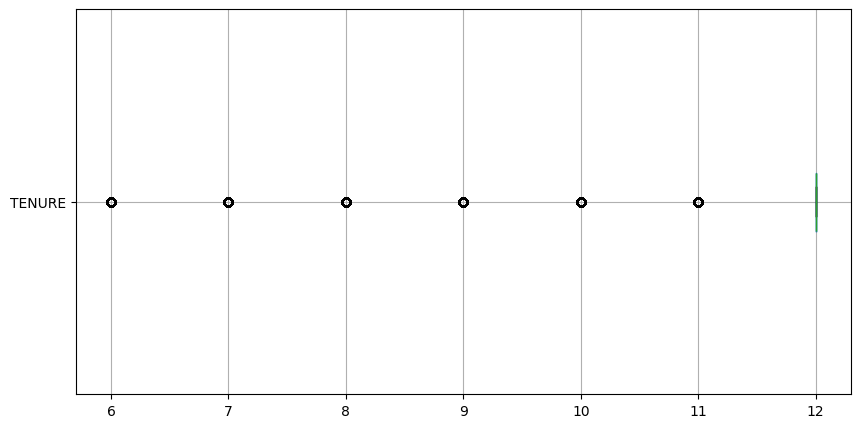

In [13]:
#check for outliers in numerical columns
for col in df.columns[1:]:
    plt.figure(figsize=(10,5))
    df.boxplot([col],vert=False)


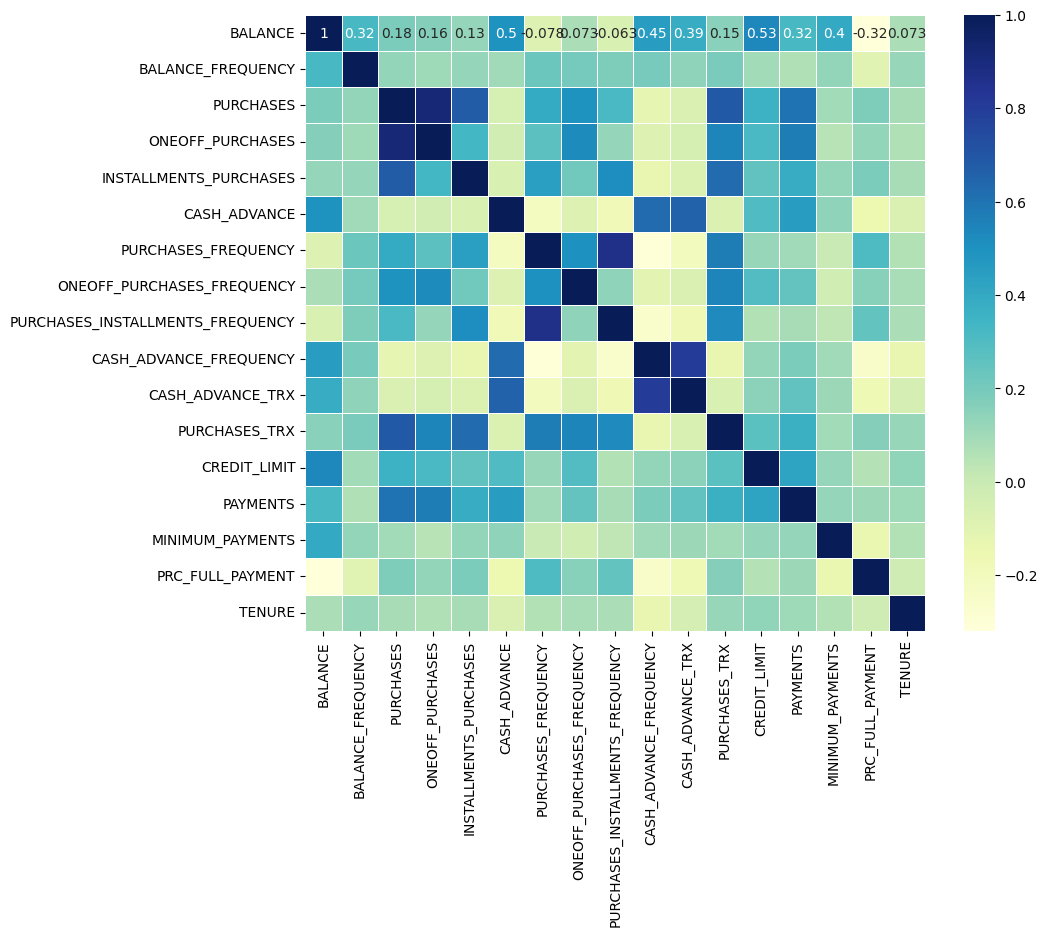

In [14]:

plt.figure(figsize=(10,8))

correlation = df.iloc[:, 1:].corr()

heatmap = sns.heatmap(correlation, annot=True,linewidths=0.5, cmap='YlGnBu')

plt.show()


<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

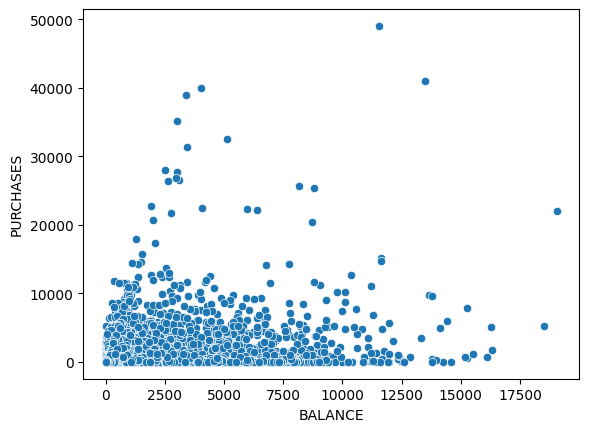

In [15]:
sns.scatterplot(data=df , x='BALANCE' , y='PURCHASES')


<Axes: xlabel='CREDIT_LIMIT', ylabel='BALANCE'>

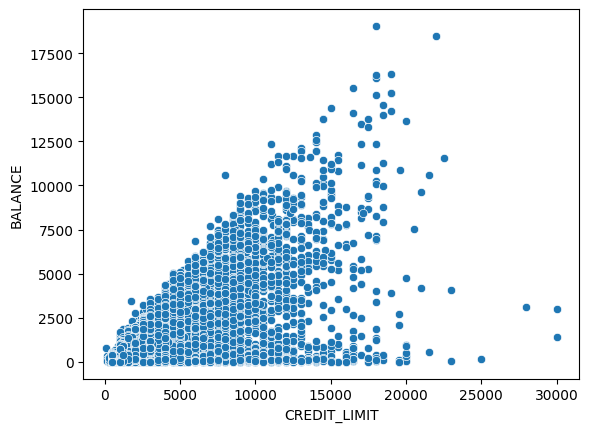

In [16]:
sns.scatterplot(data=df , x='CREDIT_LIMIT' , y='BALANCE')


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part

1- Null Values: The dataset contains missing values         <br>
2- Outliers       <br>
3-Cash Advance Frequency: Some entries have cash advance frequencies greater than one, suggesting potential data integrity issues       <br>
4-Unnecessary Columns: Certain columns, including customer_id <br>


In [3]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [4]:
df_copy.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
col = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
df_copy.dropna(subset=col, inplace=True)

In [6]:
df_copy.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Second issue**

In [7]:
#solution 
#remove customer id column , one_offpurchases , minimum payment
df_copy.drop('CUST_ID',axis=1,inplace=True)
df_copy.drop('ONEOFF_PURCHASES',axis=1,inplace=True)
df_copy.drop('MINIMUM_PAYMENTS',axis=1,inplace=True)

In [8]:
#test 
df_copy.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,0.000000,12
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,0.000000,12


**third issue**

In [9]:
#solution
#remove cash advanced frequency greater than 1
df_copy = df_copy.loc[df_copy['CASH_ADVANCE_FREQUENCY'] <= 1]

df_copy.reset_index(drop=True, inplace=True)

In [10]:
df_copy[df_copy['CASH_ADVANCE_FREQUENCY']>1]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [119]:
df_copy.shape

(8628, 15)

In [11]:
#solution
#deal with outliers
# as the outliers are important to the data we can not drop them 
# so we will transform the data using log transformation so we can reduce the effect of outliers on the data
df_copy[['BALANCE','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
         'CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','PRC_FULL_PAYMENT']] = np.log(df_copy[['BALANCE','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
                                                                                                             'CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','PRC_FULL_PAYMENT']]+1)


In [12]:
#test
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,4.568506,0.000000,0.166667,0.000000,0.083333,0.00,0.000000,1.098612,6.908755,5.312231,0.000000,12
1,8.071989,0.909091,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.25,1.609438,0.000000,8.853808,8.319725,0.200671,12
2,7.822504,1.000000,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0.000000,2.564949,8.922792,6.434654,0.000000,12
3,6.707735,1.000000,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.00,0.000000,0.693147,7.090910,6.521114,0.000000,12
4,7.501540,1.000000,7.196147,7.196147,0.000000,0.666667,0.000000,0.583333,0.00,0.000000,2.197225,7.496097,7.244983,0.000000,12


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler 


In [14]:
#using standard scaler
scaler1= StandardScaler()
StandardScaled_data = scaler1.fit_transform(df_copy)
StandardScaled_data

array([[-1.33385334, -0.36954009, -0.12381063, ..., -1.29528941,
        -0.56995666,  0.35401653],
       [ 0.95388503,  0.0680304 , -1.68701613, ...,  1.29703312,
         0.36657916,  0.35401653],
       [ 0.82227398,  0.5056009 ,  0.58902697, ..., -0.32781219,
        -0.56995666,  0.35401653],
       ...,
       [-1.6191292 , -0.29661408,  0.01681518, ..., -2.072957  ,
         0.47146156, -4.24260439],
       [-1.89519227, -0.29661408, -1.68701613, ..., -2.44308089,
         0.47146156, -4.24260439],
       [-0.17952396, -1.09882424,  0.70742905, ..., -2.28719721,
        -0.56995666, -4.24260439]])

In [15]:
#usimg MinMaxScaler
scaler2= MinMaxScaler()
minmaxscaled_data = scaler2.fit_transform(df_copy)
minmaxscaled_data

array([[0.37904492, 0.818182  , 0.42299404, ..., 0.48804031, 0.        ,
        1.        ],
       [0.81911584, 0.909091  , 0.        , ..., 0.76687871, 0.28950635,
        1.        ],
       [0.79379905, 1.        , 0.61588363, ..., 0.59210521, 0.        ,
        1.        ],
       ...,
       [0.32416906, 0.833333  , 0.46104654, ..., 0.40439192, 0.32192809,
        0.        ],
       [0.27106538, 0.833333  , 0.        , ..., 0.36458023, 0.32192809,
        0.        ],
       [0.60109251, 0.666667  , 0.64792252, ..., 0.38134757, 0.        ,
        0.        ]])

In [16]:
#using RobustScaler
scaler3= RobustScaler()
RobustScaled_data = scaler3.fit_transform(df_copy)
RobustScaled_data

array([[-1.16611291, -2.        , -0.4204873 , ..., -0.96755852,
         0.        ,  0.        ],
       [ 0.47250386, -1.        , -1.82878516, ...,  0.98770361,
         1.30177915,  0.        ],
       [ 0.37823605,  0.        ,  0.22171084, ..., -0.23783776,
         0.        ,  0.        ],
       ...,
       [-1.37044475, -1.83333883, -0.29379697, ..., -1.55411517,
         1.44756506, -6.        ],
       [-1.56817784, -1.83333883, -1.82878516, ..., -1.83328152,
         1.44756506, -6.        ],
       [-0.3393123 , -3.66666667,  0.32837974, ..., -1.71570608,
         0.        , -6.        ]])

## elbow method

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans_elbow_method(data, scaler_name):
    inertia_values = []
    silhouette_scores = []
    clusters_range = range(2, 11)  
    
    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)  
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    
    plt.figure(figsize=(8, 4))
    plt.plot(clusters_range, inertia_values, marker='o', linestyle='-')
    plt.title(f"Elbow Curve for {scaler_name}")
    plt.grid(True)
    plt.show()
    
    # Plotting Silhouette scores
    plt.figure(figsize=(8, 4))
    plt.plot(clusters_range, silhouette_scores, marker='o', linestyle='-')
    plt.title(f"Silhouette Score for {scaler_name}")
    plt.grid(True)
    plt.show()

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

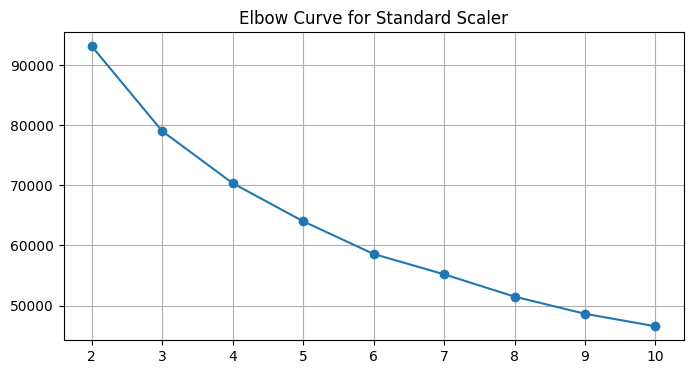

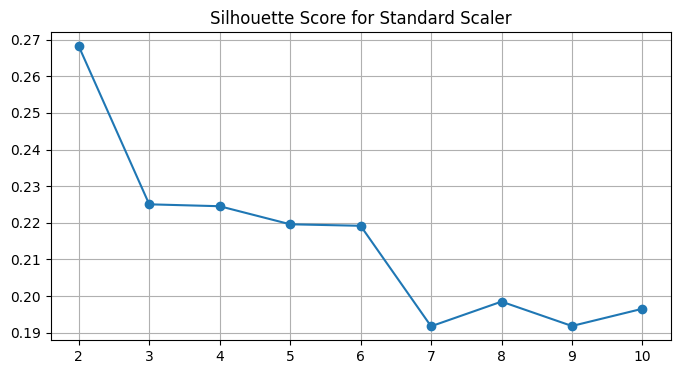

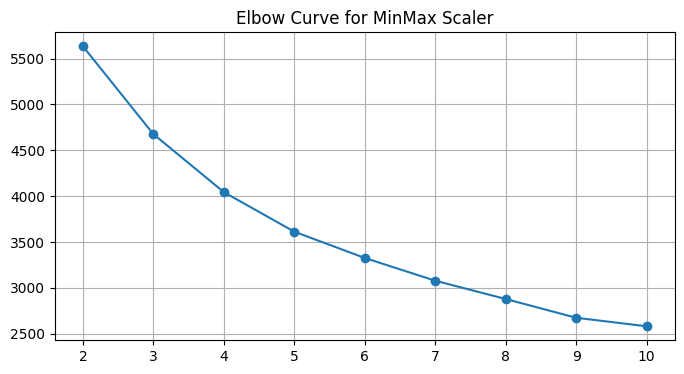

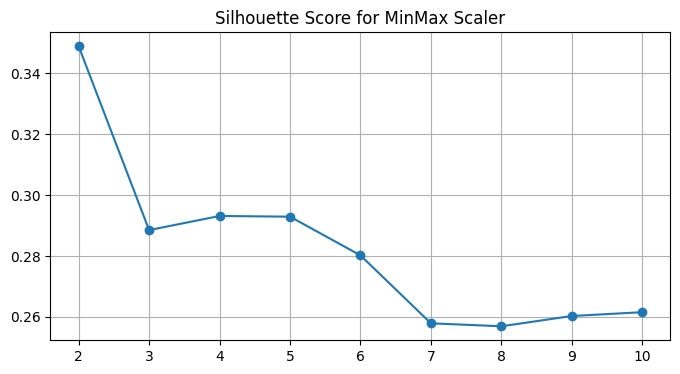

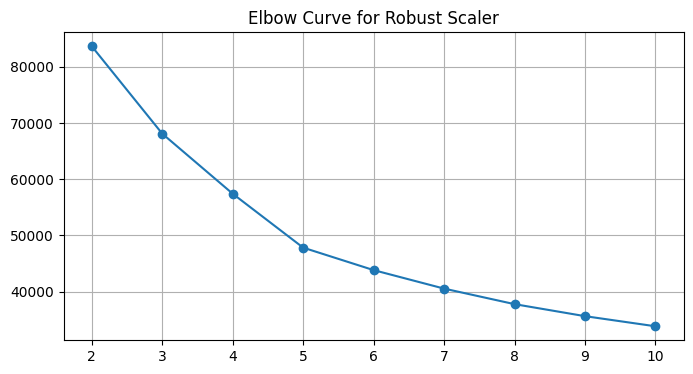

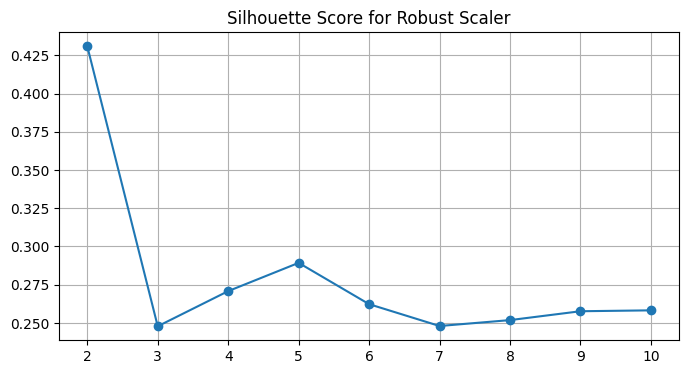

In [134]:
kmeans_elbow_method(StandardScaled_data, "Standard Scaler")
kmeans_elbow_method(minmaxscaled_data, "MinMax Scaler")
kmeans_elbow_method(RobustScaled_data, "Robust Scaler")

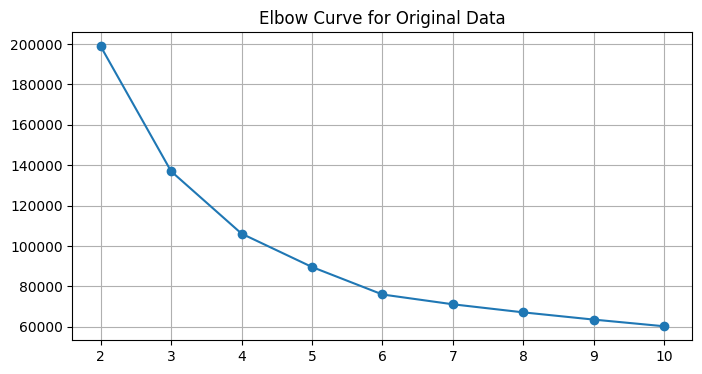

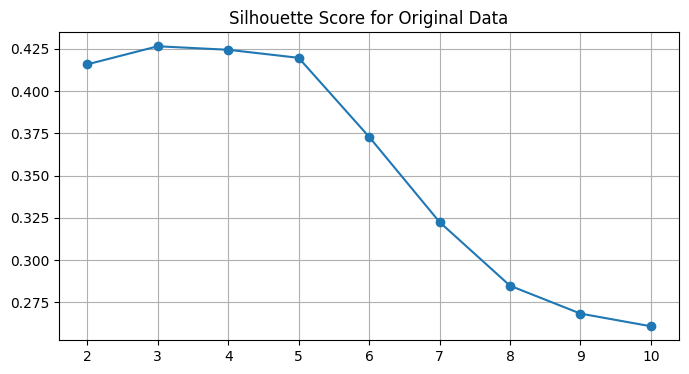

In [135]:
kmeans_elbow_method(df_copy, "Original Data")

In [18]:
#using kmeans
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE 


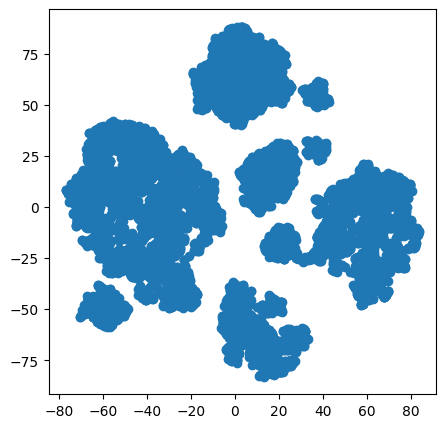

In [19]:
tsne = TSNE(n_components=2)

tsne_data = tsne.fit_transform(df_copy)

plt.figure(figsize=(5, 5))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], cmap='viridis')
plt.show()

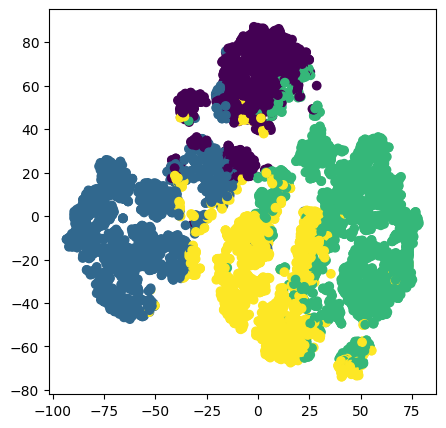

In [146]:
#using kmeans on StandardScaled_data
kmeans = KMeans(n_clusters=4).fit(StandardScaled_data)
tsne = TSNE(n_components=2)


tsne_data = tsne.fit_transform(StandardScaled_data)

plt.figure(figsize=(5,5))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.show()


In [147]:
from sklearn.metrics import silhouette_score
silhouette_score_pca = silhouette_score(StandardScaled_data, kmeans.labels_)
print("Silhouette Score (KMeans ):", silhouette_score_pca)

Silhouette Score (KMeans ): 0.22445584022844048


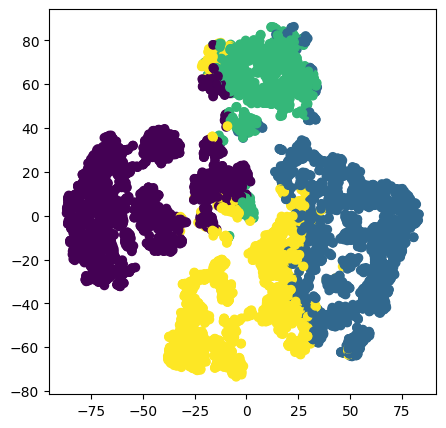

In [144]:
#using kmeans on minmaxscaled
kmeans = KMeans(n_clusters=4).fit(minmaxscaled_data)
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(minmaxscaled_data)
plt.figure(figsize=(5,5))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.show()


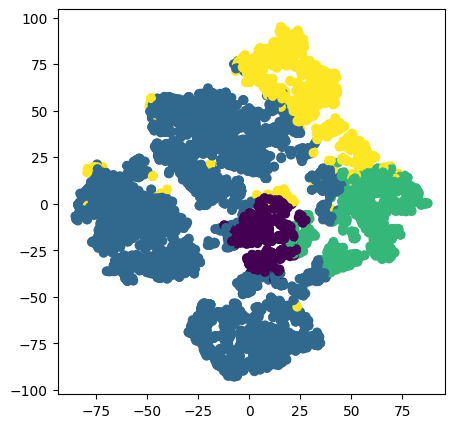

In [145]:
#using kmeans on RobustScaled
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(RobustScaled_data)
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(RobustScaled_data)
plt.figure(figsize=(5,5))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.show()

In [ ]:
#kmeans
#standard scaler
#num of clusters = 4

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

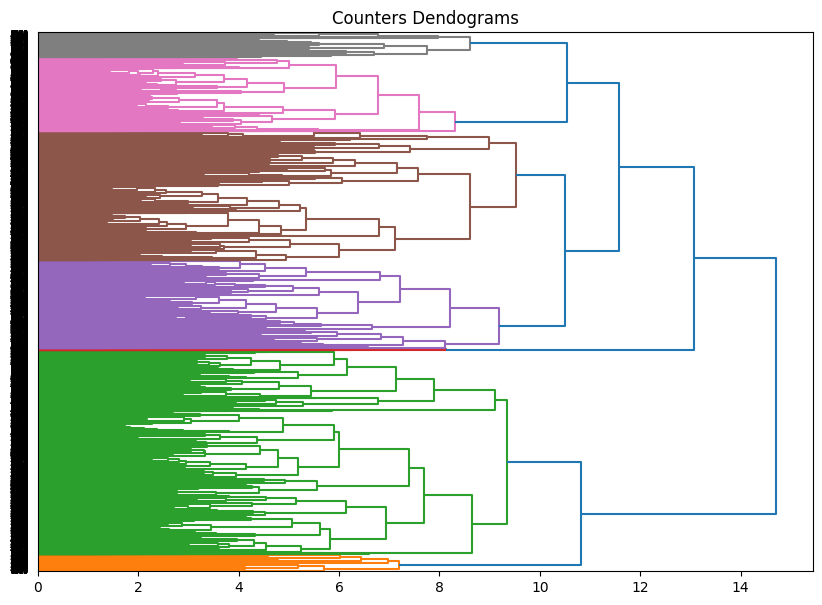

In [71]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=StandardScaled_data , method="complete",metric="euclidean"),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [20]:
#using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
agg_clustering = AgglomerativeClustering()
agg_clustering.fit(StandardScaled_data)
agg_labels = agg_clustering.labels_
silhouette_agg = silhouette_score(StandardScaled_data, agg_labels)
print("Silhouette Score for Agglomerative Clustering:", silhouette_agg)

Silhouette Score for Agglomerative Clustering: 0.2588788419360972


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [21]:
# After applying PCA to reduce the number of features with kmeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(StandardScaled_data)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_pca)
kmeans_labels_pca = kmeans.labels_
silhouette_score_pca = silhouette_score(df_pca, kmeans_labels_pca)
print("Silhouette Score (KMeans with PCA):", silhouette_score_pca)


Silhouette Score (KMeans with PCA): 0.41509580404971896


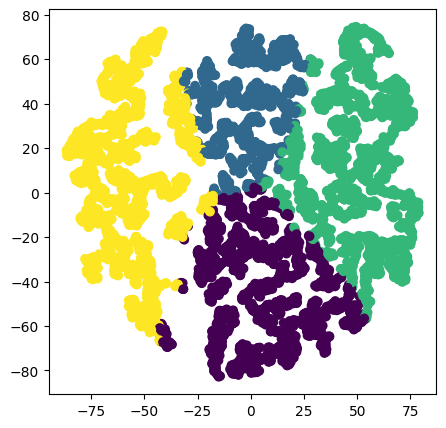

In [151]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(df_pca)
plt.figure(figsize=(5,5))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans_labels_pca, cmap='viridis')
plt.show()

## using PCA with hierarchical clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical.fit(df_pca)
hierarchical_labels_pca = hierarchical.labels_
silhouette_score_pca = silhouette_score(df_pca, hierarchical_labels_pca)
print("Silhouette Score (Hierarchical Clustering with PCA):", silhouette_score_pca)

Silhouette Score (Hierarchical Clustering with PCA): 0.35532342757163266


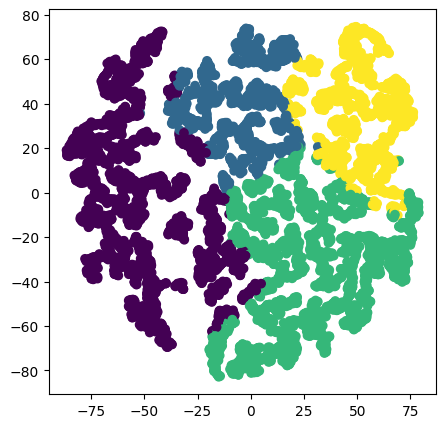

In [153]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(df_pca)
plt.figure(figsize=(5,5))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=hierarchical_labels_pca, cmap='viridis')
plt.show()

## using PCA with DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_pca)
dbscan_labels_pca = dbscan.labels_
dbscan_labels_pca_clean = dbscan_labels_pca[dbscan_labels_pca != -1]

if len(set(dbscan_labels_pca_clean)) > 1:  # Check if there are at least two clusters
    silhouette_score_pca = silhouette_score(df_pca[dbscan_labels_pca != -1], dbscan_labels_pca_clean)
    print("Silhouette Score (DBSCAN with PCA):", silhouette_score_pca)
else:
    print("DBSCAN with PCA resulted in only one cluster. Silhouette score cannot be calculated.")


Silhouette Score (DBSCAN with PCA): 0.40311419160247264


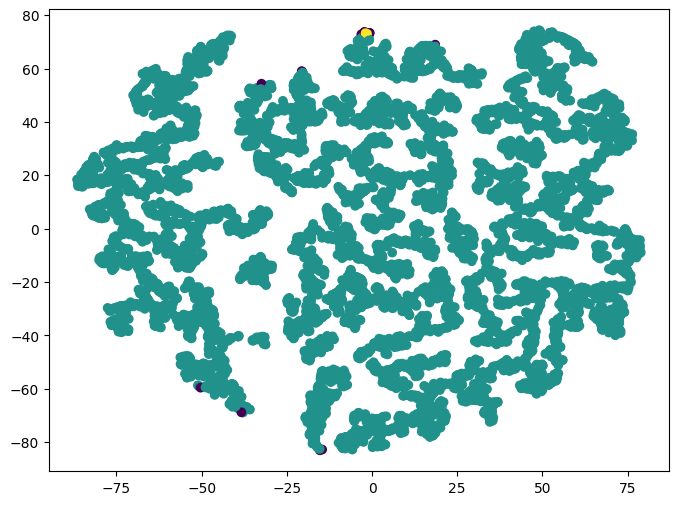

In [102]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(df_pca)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=dbscan_labels_pca, cmap='viridis')
plt.show()

## using PCA with  isolated random forest 

In [24]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.05, random_state=42)

isolation_forest.fit(df_pca)

anomaly_scores = isolation_forest.decision_function(df_pca)

print("Anomaly Scores:", anomaly_scores)


Anomaly Scores: [ 0.10093834  0.12666316  0.1573319  ...  0.07064738 -0.05031916
  0.1385807 ]


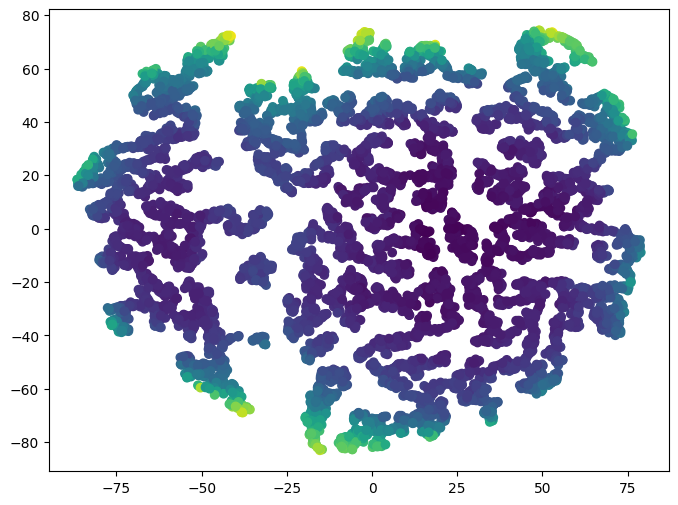

In [104]:

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(df_pca)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=-anomaly_scores, cmap='viridis')
plt.show()


## using PCA with  EM

In [25]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(df_pca)
gmm_labels_pca = gmm.predict(df_pca)
gmm_probabilities = gmm.predict_proba(df_pca)
silhouette_score_pca = silhouette_score(df_pca, gmm_labels_pca)
print("Silhouette Score (GMM with PCA):", silhouette_score_pca)



Silhouette Score (GMM with PCA): 0.3414305318392701


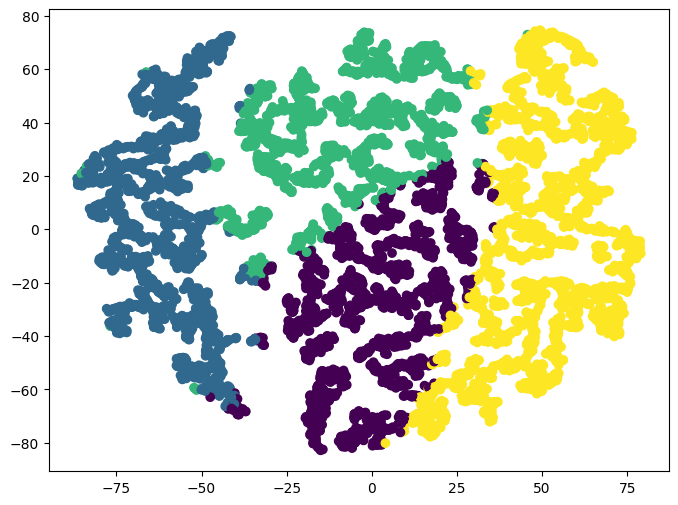

In [155]:
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(df_pca)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=gmm_labels_pca, cmap='viridis')
plt.show()


Centroids of KMeans Clusters:
Cluster 1: [ 0.45125584 -1.92036123]
Cluster 2: [0.13030404 2.36537614]
Cluster 3: [2.52635834 0.33021076]
Cluster 4: [-3.06405319  0.13715564]


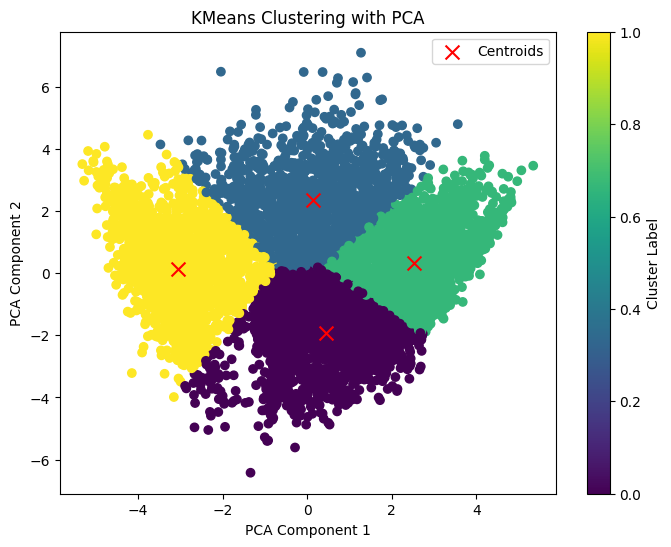

In [167]:
print("Centroids of KMeans Clusters:")
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i+1}: {centroid}")

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels_pca, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('KMeans Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

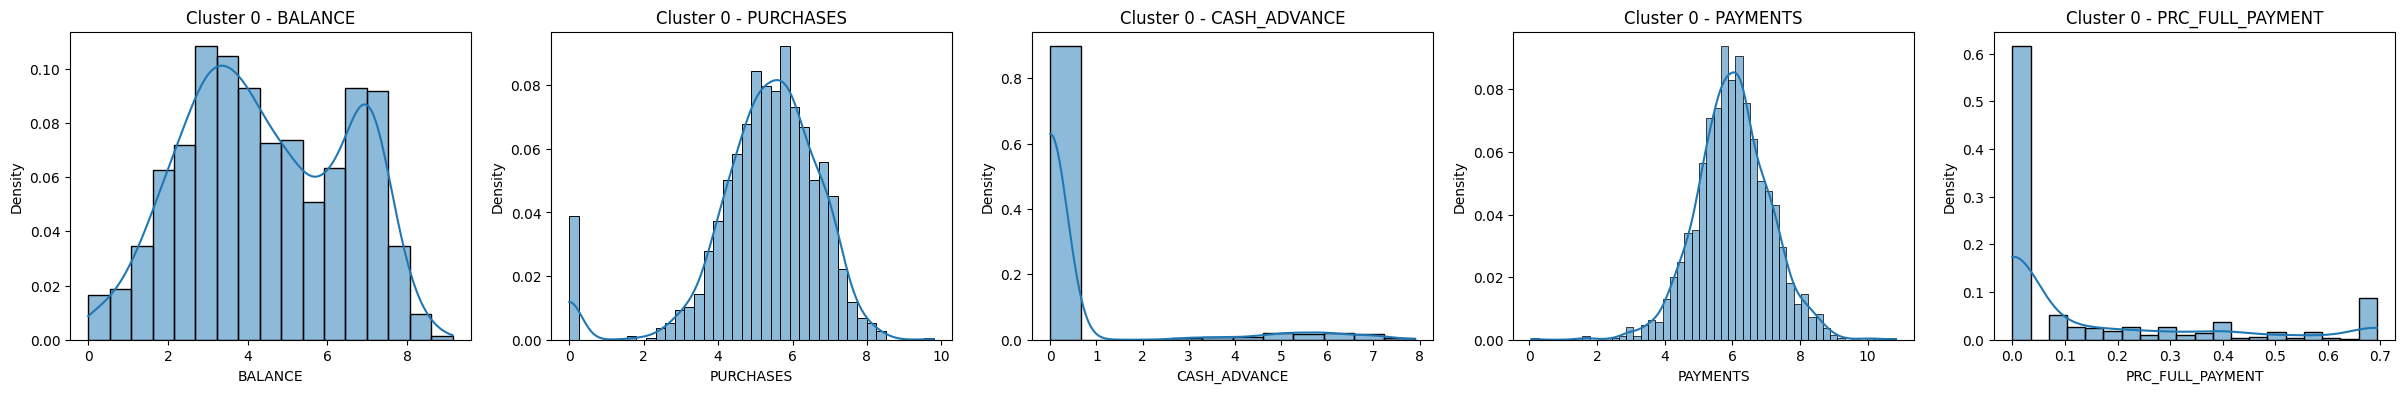

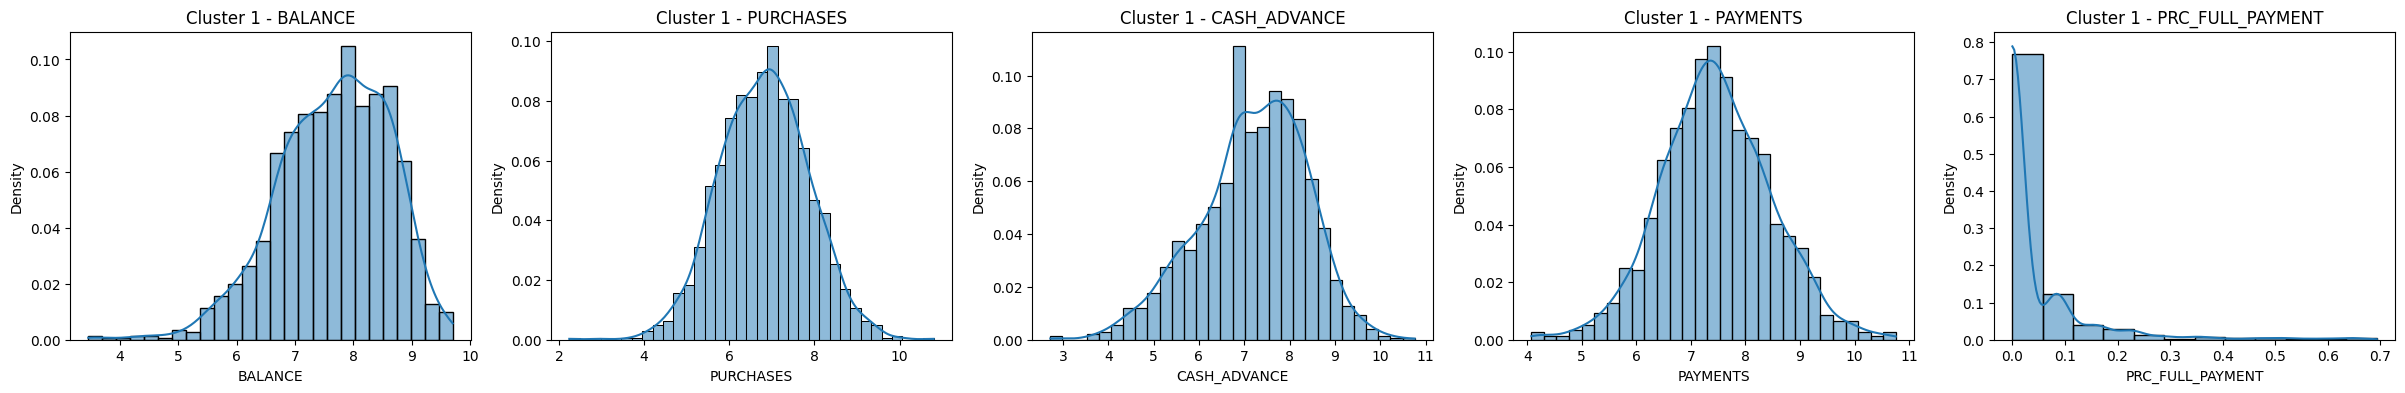

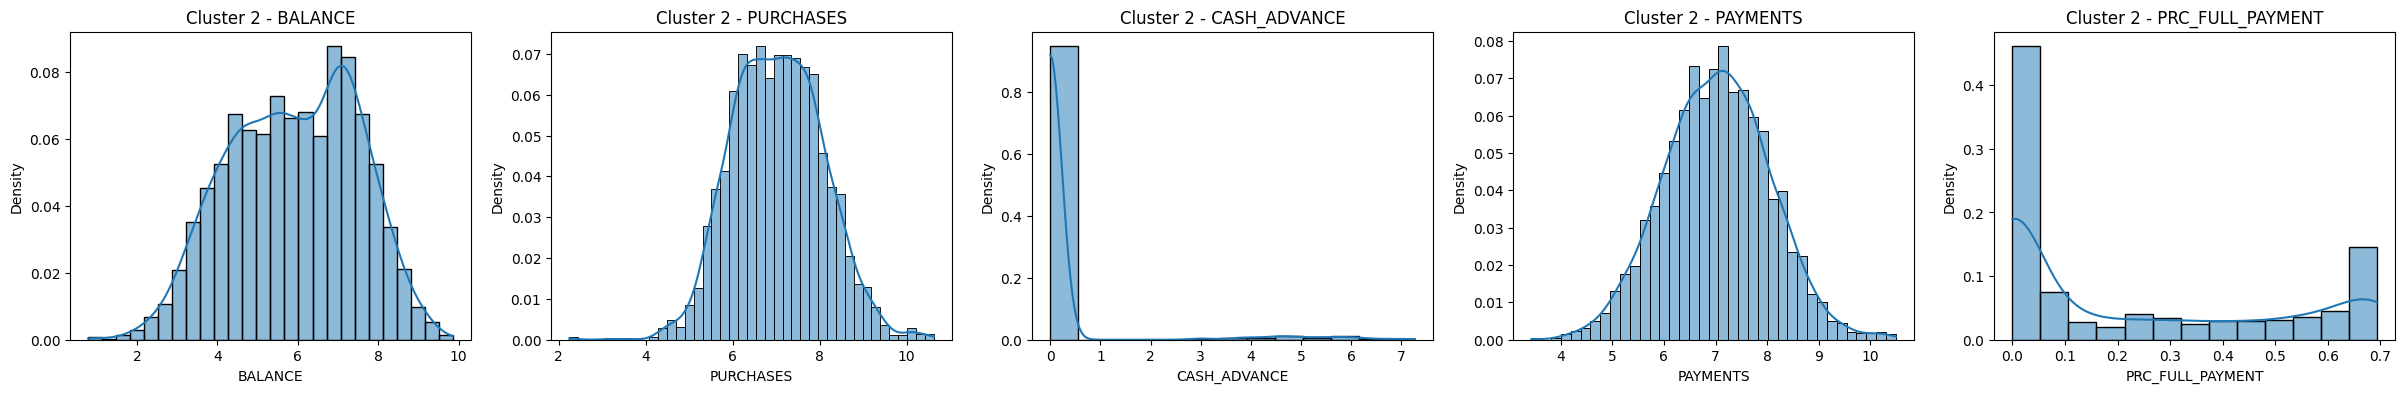

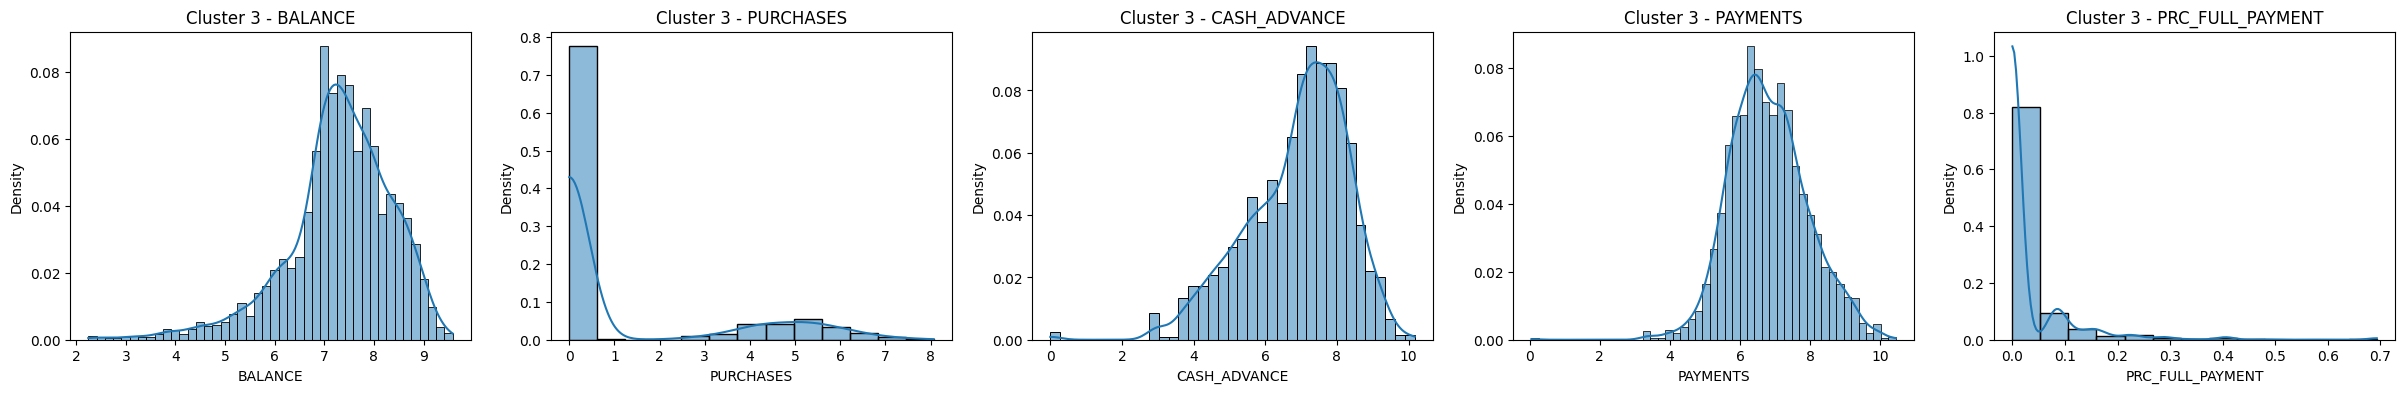

In [174]:
from sklearn.cluster import KMeans
import seaborn as sns

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(StandardScaled_data)
cluster_labels = kmeans.labels_

# Assign cluster labels to the DataFrame
df_copy['Cluster_Labels'] = cluster_labels

# Define the feature columns for visualization
feature_columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS',  'PRC_FULL_PAYMENT']

# Iterate over each unique cluster label
for cluster_label in sorted(df_copy['Cluster_Labels'].unique()):
    # Filter data points belonging to the current cluster
    cluster_data = df_copy[df_copy['Cluster_Labels'] == cluster_label]
    
    # Create subplots for each feature
    fig, axes = plt.subplots(1, len(feature_columns), figsize=(len(feature_columns) * 6, 4))
    
    # Plot normalized distribution for each feature
    for i, feature in enumerate(feature_columns):
        sns.histplot(cluster_data[feature], kde=True, ax=axes[i], stat='proportion')
        axes[i].set_title(f'Cluster {cluster_label} - {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')

plt.show()


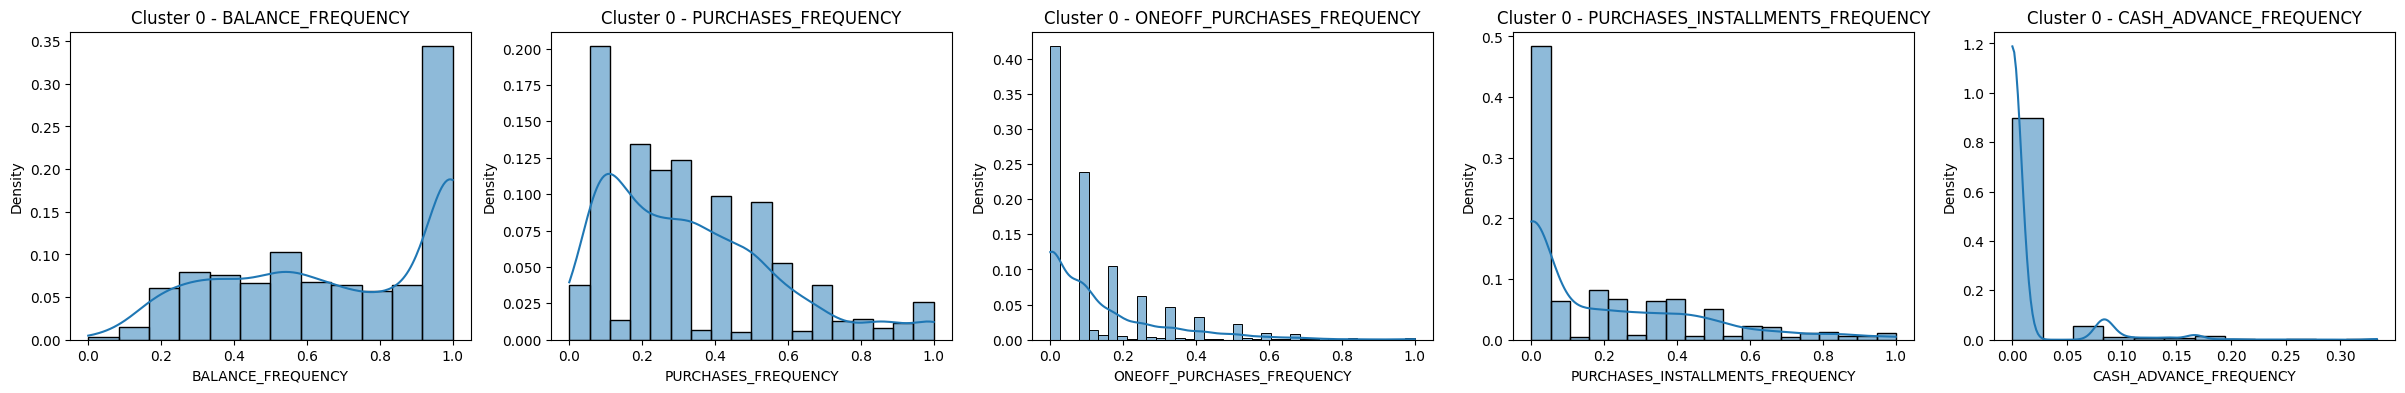

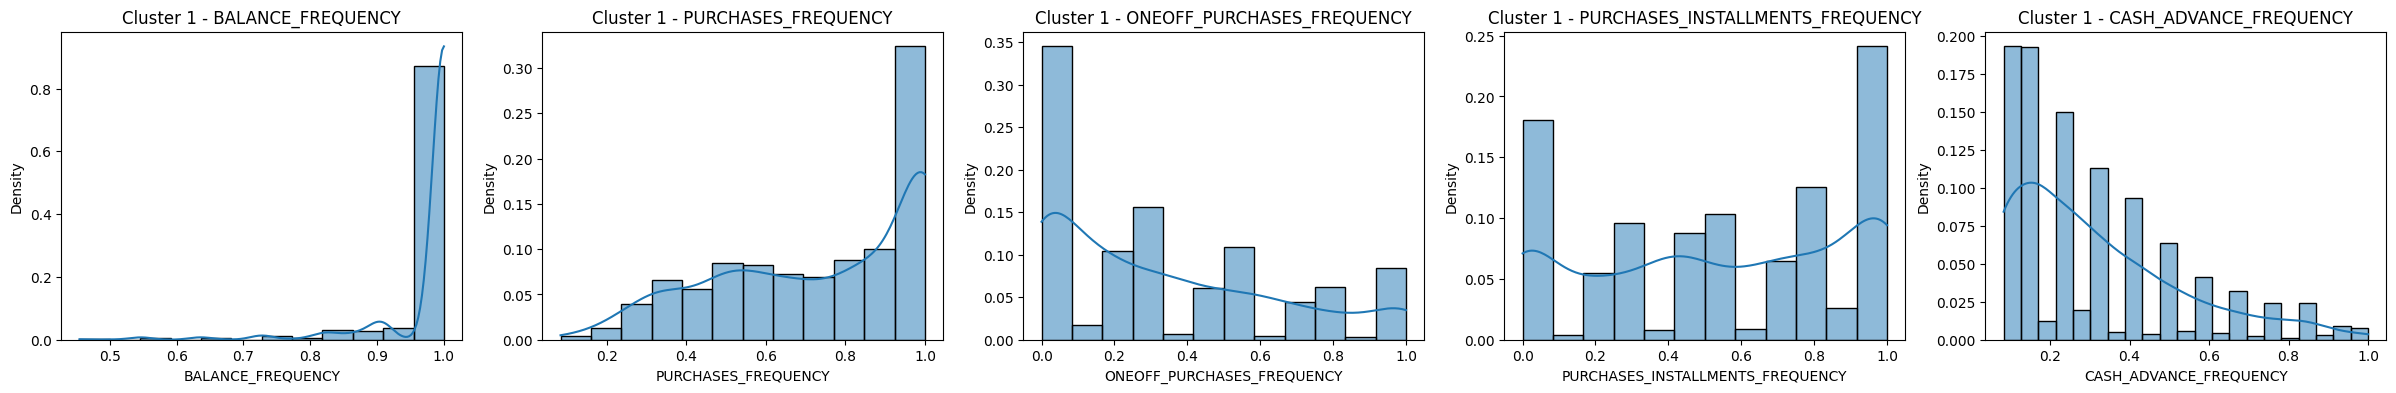

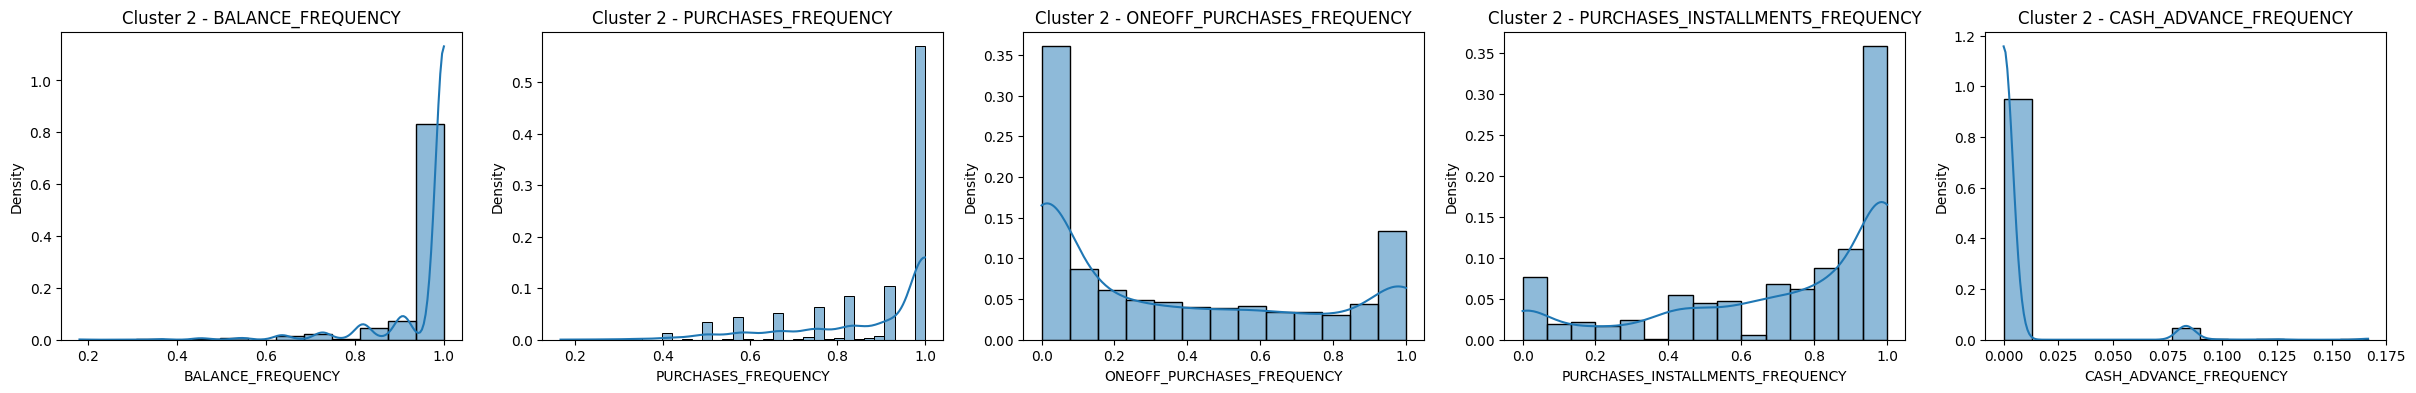

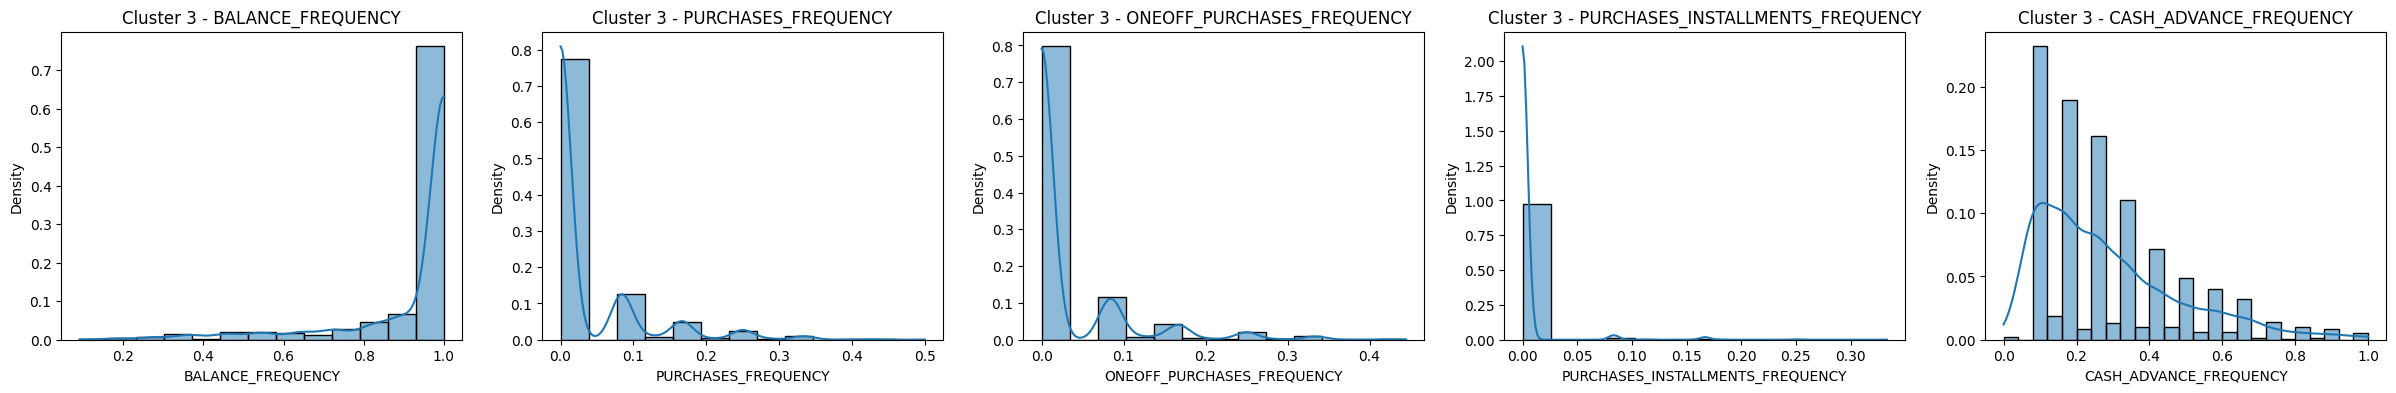

In [178]:
from sklearn.cluster import KMeans
import seaborn as sns

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(StandardScaled_data)
cluster_labels = kmeans.labels_

# Assign cluster labels to the DataFrame
df_copy['Cluster_Labels'] = cluster_labels

# Define the feature columns for visualization
feature_columns =['BALANCE_FREQUENCY' ,'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
                   'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY']

# Iterate over each unique cluster label
for cluster_label in sorted(df_copy['Cluster_Labels'].unique()):
    # Filter data points belonging to the current cluster
    cluster_data = df_copy[df_copy['Cluster_Labels'] == cluster_label]
    
    # Create subplots for each feature
    fig, axes = plt.subplots(1, len(feature_columns), figsize=(len(feature_columns) * 6, 4))
    
    # Plot normalized distribution for each feature
    for i, feature in enumerate(feature_columns):
        sns.histplot(cluster_data[feature], kde=True, ax=axes[i], stat='proportion')
        axes[i].set_title(f'Cluster {cluster_label} - {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')

plt.show()


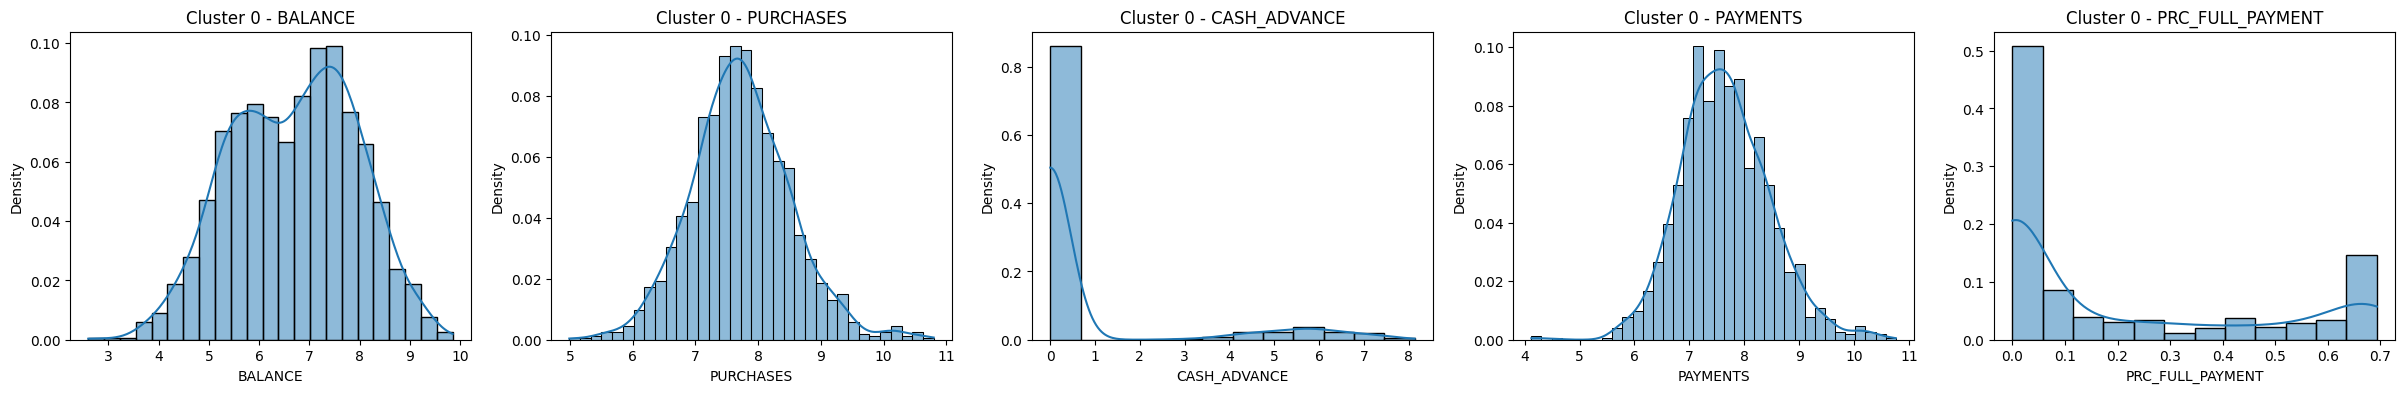

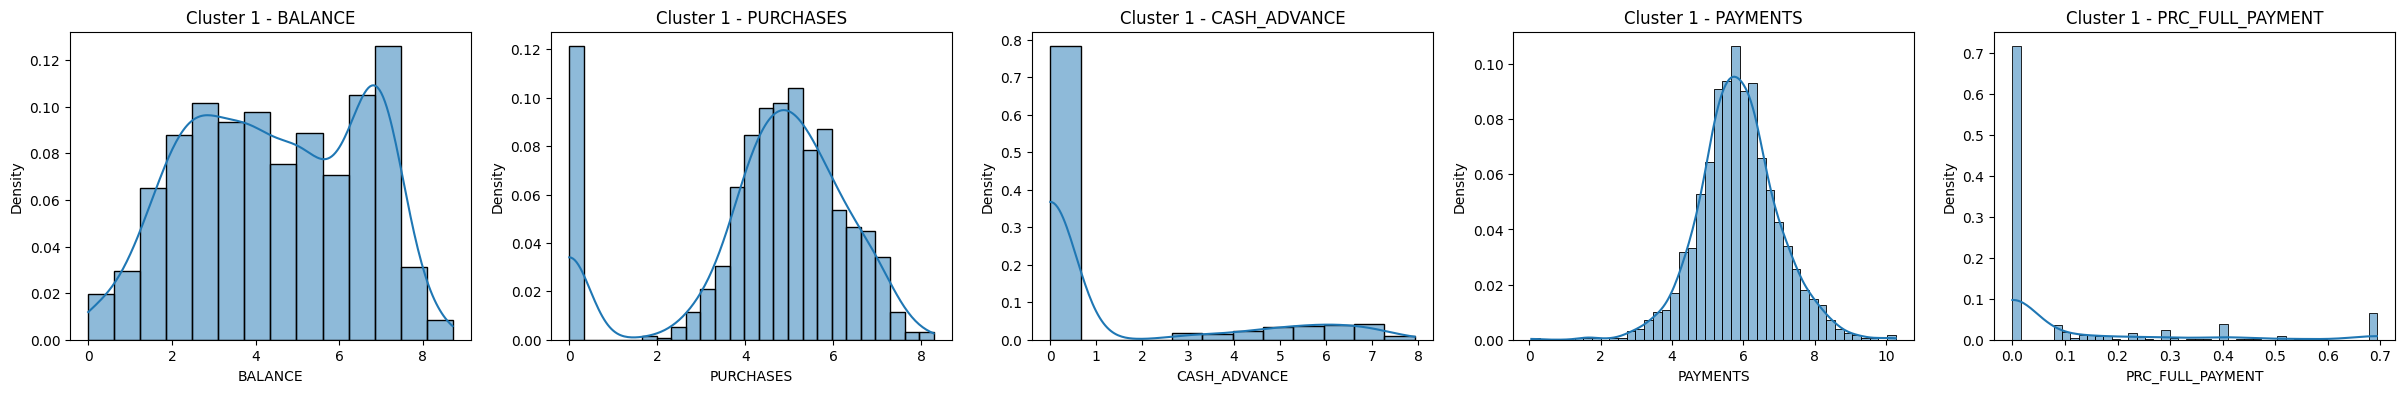

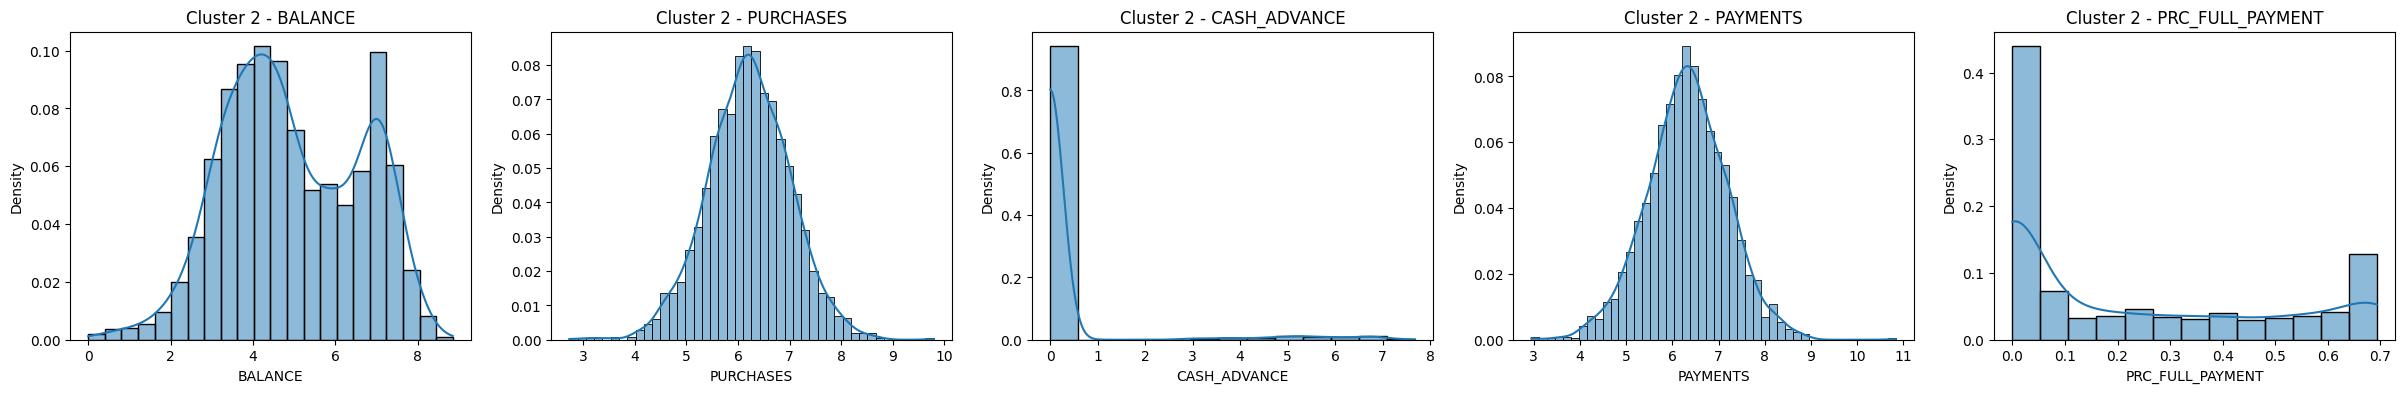

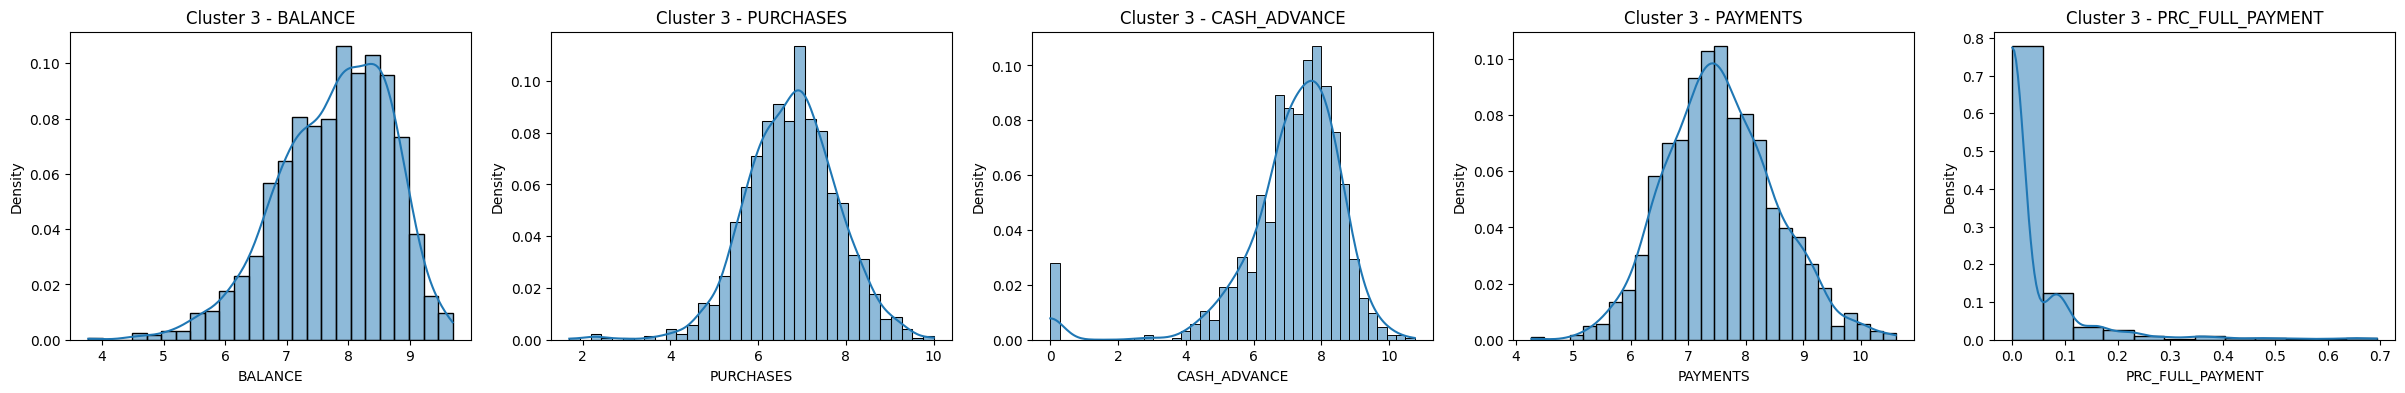

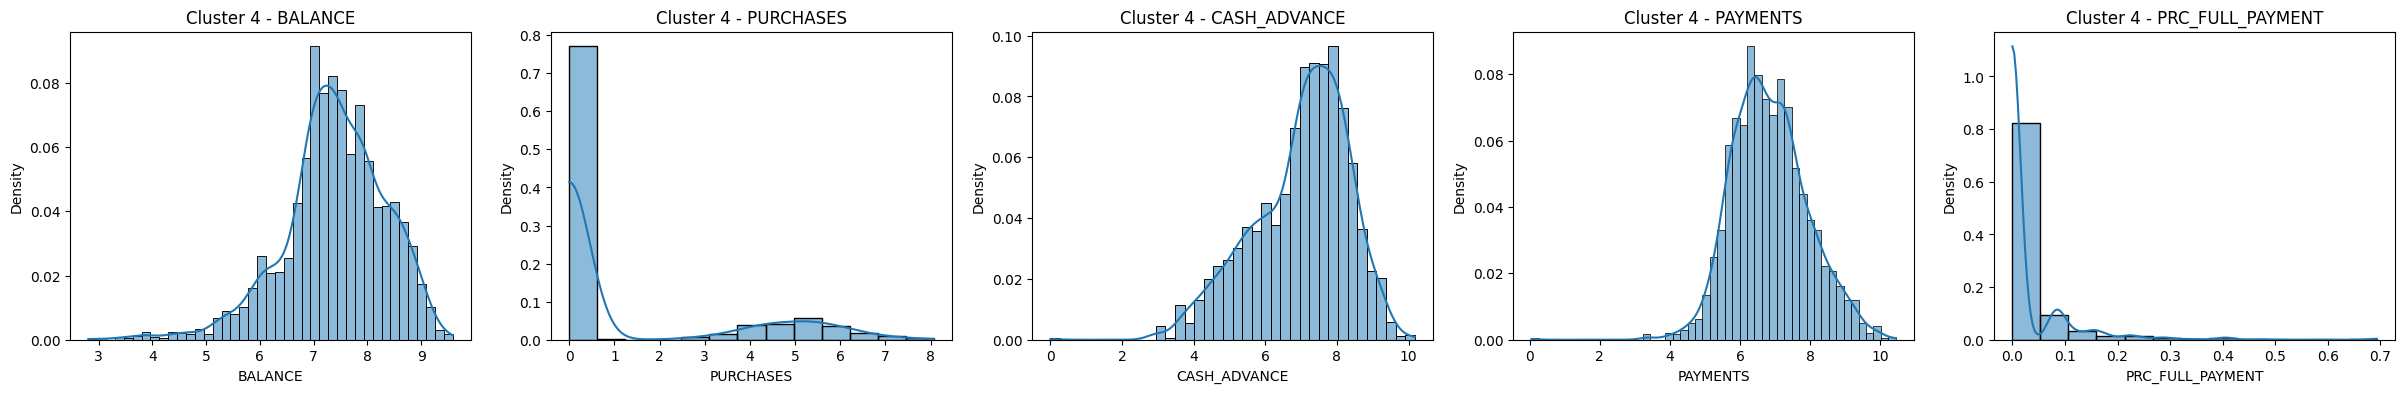

In [37]:
# get business meaning of clusters

from sklearn.cluster import KMeans
import seaborn as sns

# Perform KMeans clustering




final_df = df_copy.copy()

final_df['cluster'] = kmeans.predict(df_pca)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_pca)
cluster_labels = kmeans.labels_

# Assign cluster labels to the DataFrame
final_df['Cluster_Labels'] = kmeans.predict(df_pca)

df2= final_df.copy()
df2['pca_labels'] = cluster_labels

# Define the feature columns for visualization
feature_columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS',  'PRC_FULL_PAYMENT']

# Iterate over each unique cluster label
for cluster_label in sorted(df2['pca_labels'].unique()):
    # Filter data points belonging to the current cluster
    cluster_data = df2[df2['pca_labels'] == cluster_label]
    
    # Create subplots for each feature
    fig, axes = plt.subplots(1, len(feature_columns), figsize=(len(feature_columns) * 6, 4))
    
    # Plot normalized distribution for each feature
    for i, feature in enumerate(feature_columns):
        sns.histplot(cluster_data[feature], kde=True, ax=axes[i], stat='proportion')
        axes[i].set_title(f'Cluster {cluster_label} - {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')

plt.show()
